In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [43]:
# Load the dataset
data = pd.read_csv('WineQT.csv')

In [44]:
# Preview the data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [45]:
# Drop a specific column (for example, 'fixed acidity')
data = data.drop('Id', axis=1)

In [46]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [47]:
# Define features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

In [48]:
# Binarize the target variable: high quality (1) if quality >= 7, else low quality (0)
y = np.where(y >= 7, 1, 0)


In [49]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [53]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[194   7]
 [ 12  16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       201
           1       0.70      0.57      0.63        28

    accuracy                           0.92       229
   macro avg       0.82      0.77      0.79       229
weighted avg       0.91      0.92      0.91       229


Accuracy Score:
0.9170305676855895


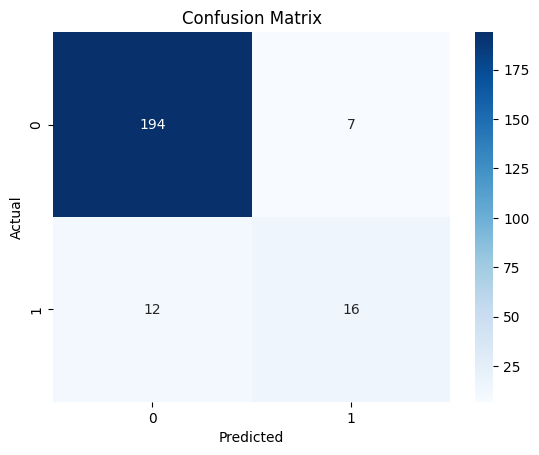

In [54]:
# Visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [55]:
# Define new input data for predictions
# Replace this with your actual input data
new_data = pd.DataFrame({
    'fixed acidity': [7.4, 7.8],
    'volatile acidity': [0.7, 0.88],
    'citric acid': [0, 0],
    'residual sugar': [1.9, 2.6],
    'chlorides': [0.076, 0.098],
    'free sulfur dioxide': [11, 25],
    'total sulfur dioxide': [34, 67],
    'density': [0.9978, 0.9968],
    'pH': [3.51, 3.20],
    'sulphates': [0.56, 0.68],
    'alcohol': [9.4, 9.8]
})

In [56]:
# Standardize the new data
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data)

In [57]:
# Make predictions
predictions = model.predict(new_data_scaled)

In [60]:
# Convert predictions to high/low quality labels
predicted_quality = np.where(predictions >= 1, "High Quality", "Low Quality")

In [61]:
# Add predictions to the DataFrame
new_data['Predicted Quality'] = predicted_quality

In [63]:
# Display the results
new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Predicted Quality
0,7.4,0.70,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,Low Quality
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,Low Quality
